In [5]:
import re
import time
import sqlite3
import pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid")

In [6]:
conn = sqlite3.connect("imdb.db")

In [3]:
consulta4 = '''
            SELECT rating AS Rating, premiered FROM
            ratings JOIN titles ON ratings.title_id = titles.title_id
            WHERE premiered <= 2022 AND type = 'movie'
            ORDER BY premiered
            '''

In [7]:
resultado4 = pd.read_sql_query(consulta4, conn)

In [9]:
display(resultado4)

,Rating,premiered
0,6.2,1896
1,4.5,1897
2,3.9,1899
3,3.7,1899
4,6.0,1900
...,...,...
273289,5.4,2022
273290,8.0,2022
273291,8.0,2022
273292,1.7,2022


In [10]:
ratings = []
for year in set(resultado4['premiered']):
    ratings.append(np.median(resultado4[resultado4['premiered'] == year]['Rating']))

In [11]:
type(ratings)

list

In [17]:
ratings[1:10]

[4.5, 3.8, 5.85, 4.6, 3.5, 5.6, 5.4, 4.4, 3.7]

In [22]:
anos = list(set(resultado4['premiered']))

In [23]:
anos[1:10]

[1897, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906]

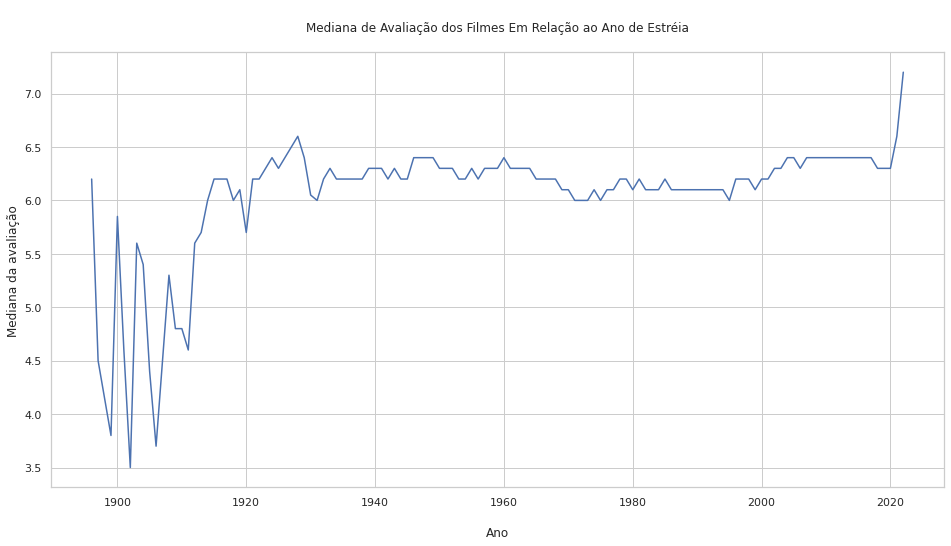

In [24]:
plt.figure(figsize=(16,8))
plt.plot(anos, ratings)
plt.xlabel('\nAno')
plt.ylabel('Mediana da avaliação')
plt.title('\nMediana de Avaliação dos Filmes Em Relação ao Ano de Estréia\n')
plt.show()